In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



# kalman filter
Sequential data assimilation with a discrete time process model and data, assuming:

 The process model is linear, and the data relate linearly to the state variables.
$$x_i = M_ix_{i-1} +\delta_i;\quad i = 1, \cdots,n;$$
$$y_i = H_ix_i +\epsilon_i\quad i = 1, \cdots,m;$$

 The prior distribution on the state, and error in the process model are normally distributed. 

 The conditional distribution on the data given the state is normal, with a mean that depends linearly on the state.
### case 1 One Dimesional 
\begin{align}
    x^f_i&= M_ix^a_{i-1}\\
    p^f_i&= M_ip^a_{i-1}M_i^T+Q_i\\
    K_i &=  p^f_iH_i/(R_i+H_ip^f_iH_i)\\
    x^a_i&= x^f_i+ K_i(Y_i-H_ix^f_i)\\
    p^a_i&= (I-K_iH_i)p^f_i
\end{align}

### QTN 

Assume we have the one dimensional process model $$x_i = x_{i-1} +\delta_i;\quad i = 1, \cdots,100;\quad \delta_i \sim N(0,0.5);$$ and $x_0$ is from a standard normal distribution.

Assume the data model is $$y_i = x_i +\epsilon_i; \quad \epsilon_i \sim N(0,0.1);$$

(a) Specify $M_i, x^a_0 , P^a_0 , Q_i, H_i$, and $R_i$ in our formulas for the Kalman  filter. (b) Identify the dimension of $x^f_i , P^f_i , K_i, x^a_i$ and $P^a_i$ in our formulas for the Kalman  filter. 

(c) Obtain an initial condition $x_0 \sim N(0,1)$. Write a Python function for the process model and use it to simulate the state $x_i$ for $t = 1,\cdots, 100$. Plot the simulated states as "truth" with a continuous line.

(d) Write a Python function for the data model and use it to simulate data $y_i$ for $t = 1,\cdots,100$. Plot the data as points on the same graph as the "true" simulated states.

(e) Write a Python function for Kalman  filter estimates $x^a_i$ , and the associated covariances $P^a_i$ for all times. Plot the estimates on the same graph as the data and "true" simulated states. Describe the relationship between the observations, true state and estimates.

(f) Plot the  ltered variances $P^a_i$ for all times. Discuss the plot.

In [2]:
def ProcesModel(xa, pa, Qi):
    δ_i= np.random.normal(0,Qi**(1/2))
    x0= np.random.normal(xa,pa**(1/2))
    xi=x0+δ_i
    return xi

def DataModel(xi, Ri): 
    ϵ_i= np.random.normal(0,Ri**(1/2))
    yi= xi+ϵ_i
    return yi

xa=0
Mi=1
pa=1
Qi=0.5
Hi=1
Ri=0.1
n=100
xlist=[]
for i in range(1,n+1):
    xlist.append(ProcesModel(xa, pa, Qi))  
Xi= np.array(xlist)

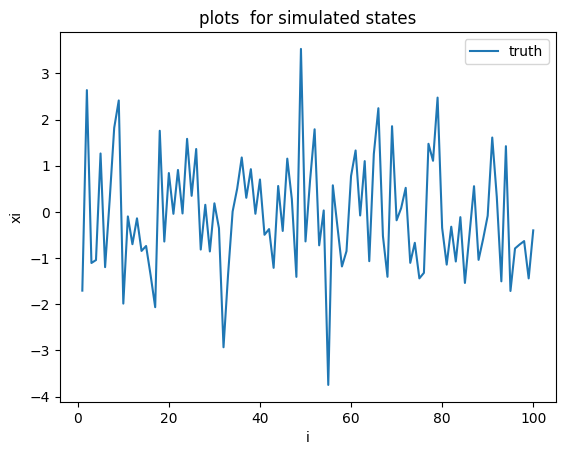

In [3]:
plt.plot ([i for  i in range(1,n+1)],Xi,label= "truth")
plt.title('plots  for simulated states' )
plt.xlabel("i")
plt.ylabel("xi")
plt.legend()

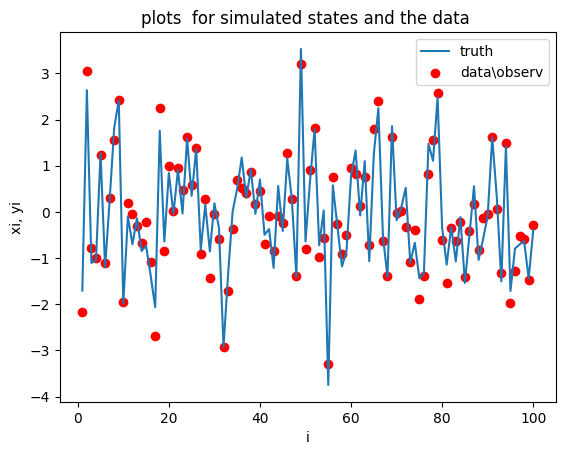

In [4]:
ylist=[]
for xi in Xi:
    ylist.append(DataModel(xi, Ri))
Yi= np.array(ylist)
plt.plot ([i for  i in range(1,n+1)],Xi,label= "truth")
plt.scatter ([i for  i in range(1,n+1)],Yi,c="red",label= "data\observ")
plt.title('plots  for simulated states and the data ' )
plt.xlabel("i")
plt.ylabel("xi, yi")
plt.legend();

In [5]:
def KalM(Mi,xa,Qi,Ri,Hi,I):
    xf_i= Mi*xa
    pf_i= Mi*pa*Mi+Qi
    Ki =  pf_i*Hi/(Ri+Hi*pf_i*Hi)
    xa_i= xf_i+ Ki*(Yi-Hi*xf_i)
    pa_i= (I-Ki*Hi)*pf_i
    return  xa_i,pa_i,xf_i
I=1
xa_i,pa_i,xf_i = KalM(Mi,xa,Qi,Ri,Hi,I)


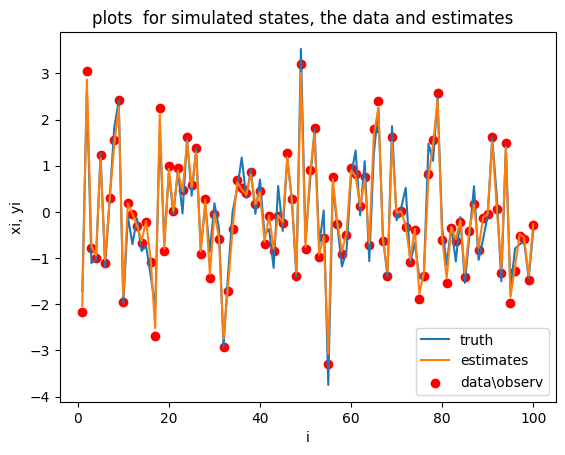

In [6]:
plt.plot ([i for  i in range(1,n+1)],Xi,label= "truth")
plt.plot ([i for  i in range(1,n+1)],xa_i,label= "estimates")
plt.scatter ([i for  i in range(1,n+1)],Yi,c="red",label= "data\observ")
plt.title('plots  for simulated states, the data and estimates  ' )
plt.xlabel("i")
plt.ylabel("xi, yi")
plt.legend();

### case 2 Extended  Two Dimensional 

Deals with Nonlinear process and data models 
$$x_i = \mathcal{M}_i(x_{i-1}) +\delta_i;\quad i = 1, \cdots,T;$$
$$y_i = \mathcal{H}_i(x_i) +\epsilon_i\quad i = 1, \cdots,m;$$
where
$x_0\sim N (\mu, \Sigma(t)),\quad \epsilon_i \sim N (0, R_t),\quad\delta_t \sim N (0, Q_t)$

and we perform 
Nonlinear Approximation Linearize about the current estimate, e.g. 
$\mathcal{M}(x_0)\approx \mathcal{M}(\mu)+\frac{\partial (\mathcal{M})}{\partial x_0}\big|_{x_0=\mu}(x_0-\mu)$

and the Jacobian matrices 
$(M^x_1)_{jk} =\big[\frac{\partial \mathcal{M}}{\partial \mathbf{x}} \big]$ and $(H^x_1)_{jk} =\big[\frac{\partial \mathcal{H}}{\partial \mathbf{x}} \big]$

\begin{align}
    x^f_i&= \mathcal{M}_i(x^a_{i-1})\\
    p^f_i&= M^x_i(x^a_{i-1})p^a_{i-1}(M^x_i(x^a_{i-1}))^T+Q_i\\
    K_i &=  p^f_i({H}^x_i(x^f_i))^T(R_i+{H}^x_i(x^f_i)p^f_i({H}^x_i(x^f_i))^T)\\
    x^a_i&= x^f_i+ K_i(Y_i-\mathcal{H}_i(x^f_i))\\
    p^a_i&= (I-K_iH^x_i(x^f_i))p^f_i
\end{align}

## QTN 

Consider the nonlinear ODE model for oscillations of a noisy pendulum with unit mass and
length $L$
$$\frac{d^2\theta}{dt^2}+\frac{d\theta}{dt}+\frac{g}{L}\sin{(\theta)}+\delta(t)=0 \qquad  (1)$$

where $\theta$ is the angular displacement of the pendulum, g is the gravitational constant, L is the
pendulum’s length, and $\delta(t) \sim N (0, \sigma(t))$. Assume there are data that relate nonlinearly to
the state $\theta(t)$ by
$$y_i= \cos{\theta (t_i)}+\epsilon_i\quad i = 1,\cdots, m$$
where $\epsilon_i \sim N (-1, \tau_i)$

(a) Preprare the data and dynamics to assimilate data using the ensemble Kalman filter

i)Let $ \mathbf{x}= \begin{pmatrix}
    x_1\\x_2
\end{pmatrix}=\begin{pmatrix}
    \theta \\ \frac{d\theta}{dt}
\end{pmatrix}$ and re-write (1) as a first order, two-dimensional system
$$\frac{d\mathbf{x}}{dt}=\mathcal{M}(\mathbf{x}(t_{i}))+\delta (t_{i}) \qquad (2)$$
i.e. identify $\mathcal{M}(\mathbf{x})$ and $\delta (t)$.


ii) Use the upstream finite difference scheme $\frac{dx}{dt}=\frac{x(t_i)-x(t_{i-1})}{\Delta t}$ to obtain a discrete
representation of the dynamics (2) in two dimensions

$x_i = \mathcal{M}(x_{i-1})+\delta_{i-1}$
 
and the data $y_i=\mathcal{H}(x_i)+\epsilon_i$

i.e. identify $ \mathcal{M}(x_{i-1})$, $\delta_{i-1}$ and $\mathcal{H}(x_i)$

iii) Find the Jacobian matrices for $\mathcal{M}(x_i)$ and $\mathcal{H}(x)$.

(b) Write a Python function for the process model and use it to simulate the state $x(t_i)$ for
$i = 1,\cdots, 500$ when the initial angle $x_1 = 1.8$ and initial angular velocity $x_2 = 0$. Plot
the simulated states as “truth” with a continuous line.

 Take    `500 time step with` $\Delta t= 0.01$,` Noise levels`  $q_c= 0.01$ and $R=0.1$ also the `inital diagonal state convarince of 0.1`
         
       

(c) Write a Python function for the data model and use it to simulate data $y_i,\quad
i = 1, \cdots , 500$.
Plot the data as points on the same graph as the “true” simulated states.

(d) Write a Python function for Kalman filter estimates $\mu_{t|t}$
, and the associated covariances
$\Sigma_{t|t}$
for all times. Plot the estimates on the same graph as the data and “true” simulated
states. Describe the relationship between the observations, true state and estimates. In
particular discuss the times when there are no data.

(e) Plot the filtered variances $\Sigma_{t|t}$
for all times.

### SOLUTION 

We are given (1)

Let $ \mathbf{x}= \begin{pmatrix}
    x_1\\x_2
\end{pmatrix}=\begin{pmatrix}
    \theta \\ \frac{d\theta}{dt}
\end{pmatrix}$
then 

\begin{align}
 x'_1 &=\dot{\theta}=x_2\\
 x'_2&=\ddot{\theta}=-x_2-\frac{g}{L}\sin{(x_1)}-\delta(t) 
\end{align}


this gives us
$
\begin{cases}
    x'_1 -x_2=0\\
 x'_2+x_2+\frac{g}{L}\sin{(x_1)}+\delta(t)=0
\end{cases}
$

$$
\begin{pmatrix}
    x'_1\\x'_2
\end{pmatrix}+\begin{pmatrix}
    -x_2 \\ x_2+\frac{g}{L}\sin{(x_1)}
\end{pmatrix}+\begin{pmatrix}
    0\\ \delta (t)
\end{pmatrix}
$$

we see that
$\mathcal{M}(x)=\begin{pmatrix}
    x_2 \\ -x_2-\frac{g}{L}\sin{(x_1)}
\end{pmatrix} 
$
and 
$\delta (t)=\begin{pmatrix}
    0\\ \delta (t)
\end{pmatrix}$

### ii) 

from the upstream finite difference scheme
$
\frac{dx}{dt}=\frac{x(t_i)-x(t_{i-1})}{\Delta t}
$


\begin{align}
    \frac{\mathbf{x}(t_i)-\mathbf{x}(t_{i-1})}{\Delta t}&=\mathcal{M}(\mathbf{x}(t_{i}))+\delta (t_{i})\\
    \mathbf{x}_i&= \mathbf{x}_{i-1} +\mathcal{M}(\mathbf{x}_{i})\Delta t+\delta_{i}\Delta t
\end{align}

we see that
$\mathcal{M}(x_{i-1})=\begin{pmatrix}
   x_1+ x_2\Delta t \\ x_2-\Delta t(x_2-\frac{g}{L}\sin{(x_1))}
\end{pmatrix}_{i-1} 
$
and 
$\delta (t)=\begin{pmatrix}
    0\\ \delta (t)\Delta t
\end{pmatrix}$

from 

\begin{align}
    y_i&= \cos{\theta (t_i)}+\epsilon_i\\&=\cos{x_1 (t_i)}+\epsilon_i\\
    \text{Compare with} \hspace{10pt} y_i&=\mathcal{H}(x_i)+\epsilon_i\\
    \mathcal{H}(x_i)&= (\cos{x_1})_i
\end{align}


the Jacobian matrices 
$M^x =\big[\frac{\partial \mathcal{M}}{\partial \mathbf{x}} \big]$ and $H^x =\big[\frac{\partial \mathcal{H}}{\partial \mathbf{x}} \big]$

$$
M^x= \begin{bmatrix}
    \frac{\partial (x_1+ x_2\Delta t )}{\partial x_1}&\frac{\partial (x_1+ x_2\Delta t )}{\partial x_2} \\
    \frac{\partial (x_2-\Delta t(x_2-\frac{g}{L}\sin{(x_1))})}{\partial x_1} &\frac{\partial (x_2-\Delta t(x_2-\frac{g}{L}\sin{(x_1))})}{\partial x_2}
\end{bmatrix}=\begin{bmatrix}
    1&\Delta t\\
    -\Delta t \frac{g}{L}\cos{x_1} &1-\Delta t
\end{bmatrix}
$$
and
$$
H^x= \begin{bmatrix}
    \frac{\partial \cos x1) }{\partial x_1}&\frac{\partial \cos x1) }{\partial x_2}
\end{bmatrix}= \begin{bmatrix}
    -\sin{x_1}&0
\end{bmatrix}
$$


In [7]:
def Mx(x):
    '''Jacobian matrices  𝑀^x function
    Inputs: x - vector
    Outputs: Jacobian matrices  𝑀^x 
    '''
    Mx = np.array([[1, Δt], [-Δt*g*np.cos(x[0])/L, 1-Δt]])
    return Mx


def Hx(x):
    '''Jacobian matrices  H^x function
    Inputs:x - vector
    Outputs: Jacobian matrices  H^x 
    '''
    Hx =  np.array([-np.sin(x[0]), 0])
    return Hx


def M(x):
    '''model propagator M function
    Inputs:Δt -chang in time, g- grvitatinal constant , L- length, x - vector
    Outputs: model propagator vector/matrix m'''
    m =  np.array([x[0] + Δt*x[1], (1 -Δt)*x[1]-Δt*g*np.sin(x[0])/L])
    return m

def H(x):
    '''observation operator   H function
    Inputs:x - vector
    Outputs: observation operator  matrix h 
    '''
    h = np.cos(x[0])
    return h

In [8]:
###SIMILATED ANGULAR DISPLACEMENT AND DATA POINTS
def ProcessModel(t, Δt, g, L, Qrt, R, n, x):
    '''Inputs:t-start time, Δt -change in time, g- grvitatinal constant , L- length, x - vector 
                Qrt-Cholesky (or "square root") matrix 
      outputs: T -time interval Xi-simulated state and   '''

    Xk = []
    xi = x

    T = []
    for i in range(n):
        t += Δt
        T.append(t)
        xi = M(xi) 
#         xk.append(xi)
        mean=np.array([0,0])
        δ_t = np.random.multivariate_normal(mean, Qrt)
        xi = xi + δ_t
        Xk.append(xi)
    
    return T,Xk  

def DataModel(R, Xk):
    '''inputs:Xi- out put from  ProcessModel,R-observation error variance
    Output: Yi-  observation  '''
    Yi = []
    for j in range(len(Xk)):
        ϵ_t = np.random.normal(0, R**(1/2))
        h = H(Xk[j])
        yi = h + ϵ_t
        Yi.append(yi)
    return  Yi

In [9]:

Δt=0.01
g=9.81
L=1
t=0
qc=0.01
R=0.1  
#inital diagonal state convarince 
b= 0.1


n=500## steps

x0= np.array([1.8,0]) 
# #model(process) error covariance matrix
Q = qc*np.array([[(Δt**3)/3,(Δt**2)/2],
                   [(Δt**2)/2,Δt]])
# # Q: process covaince matrix
 ## qc: Noise level/spectral density
'''Cholesky (or "square root") matrix'''   
Qrt = np.linalg.cholesky(Q)



T,Xk =ProcessModel(t,Δt, g, L, Qrt, R, n,x0)
Yi= DataModel(R, Xk)


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.


In [10]:
# Extraxting
Xi =[] #simulated angular 
for i in range(len(Xk)):
    Xi.append(Xk[i][0])




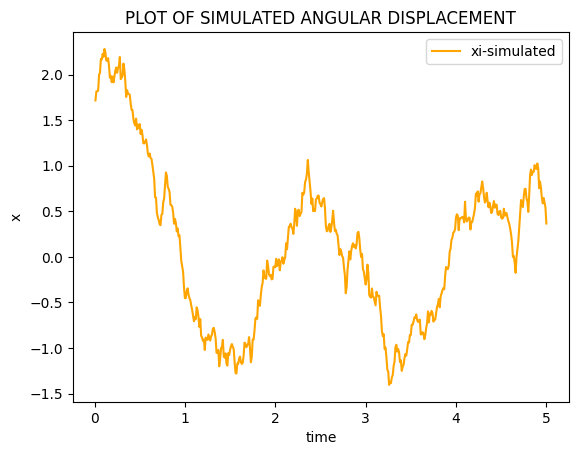

In [11]:
### PLOT OF SIMULATED ANGULAR DISPLACEMENT
plt.plot(T,Xi,label="xi-simulated",c = "orange")
plt.xlabel("time")
plt.ylabel("x")
plt.title('PLOT OF SIMULATED ANGULAR DISPLACEMENT')
plt.legend();

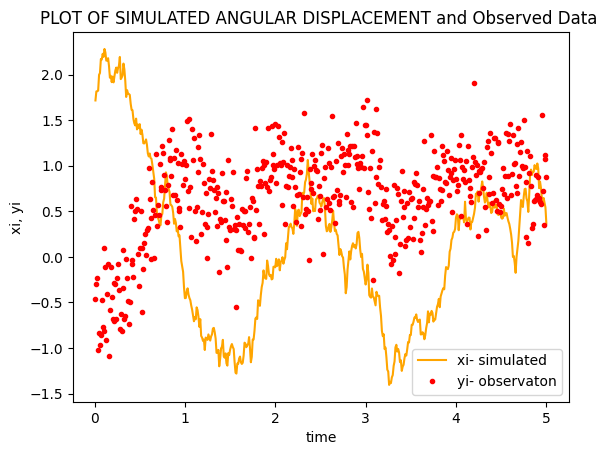

In [12]:
plt.plot(T,Xi, label="xi- simulated", c = "orange")
plt.plot(T,Yi,".r", label="yi- observaton")
plt.xlabel("time")
plt.ylabel("xi, yi")
plt.title('PLOT OF SIMULATED ANGULAR DISPLACEMENT and Observed Data ')
plt.legend();

In [13]:
def KalmanExtended(Qrt,b, R, n, x0, yi):
    '''Inputs:n-steps oftime,R-observation error var , L- length, x0 - inital cond. vector, 
               yi-observations vector  Qrt-Cholesky (or "square root") matrix
               b-inital diagonal state convarince
      outputs: xa -time interval Xi-simulated state and xk-true state vector  '''
   # initialise;
    xa = np.zeros((n+1,2))## initialise the state analysis
    xa[0] = x0.T
    pa = np.zeros((n+1,2,2))## analysis error covariance matrix
    pa[0] = b * np.eye(len(x0))
    I = np.identity(len(x0))
    for i in range(1, n+1):
        ##Compute the forecast state
        xf = M(xa[i-1])
        ##the forecast error covariance matrix
        pf = Mx(xa[i-1]) @ pa[i-1] @ Mx(xa[i-1]).T + Qrt
        ##Compute the kalman gain
        k = pf @ Hx(xf).T * (R + Hx(xf) @ pf @ (Hx(xf).T))**(-1)
        ##update
        xa[i] = (xf + k.reshape(2) * (yi[i-1] - H(xf)))##.T
        pa[i] = (I - k*Hx(xf))*pf
    return xa[:, 0][1:], pa

In [14]:
xa, pa = KalmanExtended(Qrt, b,R, n, x0, Yi)

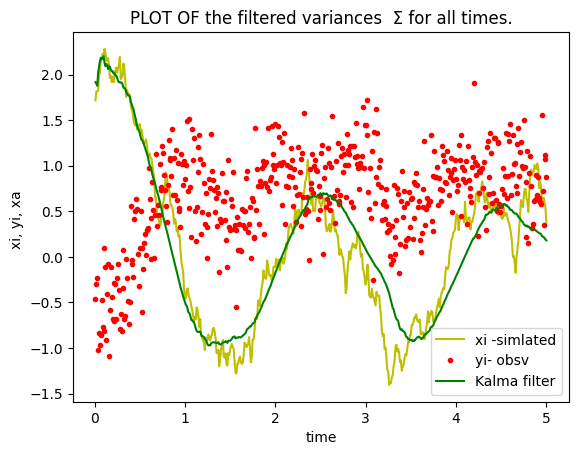

In [15]:
# xa, pa = KalmanExtended(Q, r_i, n, x0, yi)
plt.plot(T,Xi,"y",label="xi -simlated")
plt.plot(T,Yi,".r",label="yi- obsv")
plt.plot(T,xa,"g",label="Kalma filter")
plt.xlabel("time")
plt.ylabel("xi, yi, xa ")
plt.title('PLOT OF the filtered variances  Σ for all times.')
plt.legend();